In [1]:
#
# To run (on a mu2egpvm machine):
# > setup mu2e
# > muse setup TrkAna
# > setup pyana v1_04_00
# > python TrkAna/example-analysis-scripts/PythonScript.py
#
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import dask_awkward as dak
import vector
vector.register_awkward()

In [25]:
file='root://fndcadoor.fnal.gov//pnfs/fnal.gov/usr/mu2e/scratch/users/oksuzian/nts.oksuzian.CeEndpointMix1BBSignal.MDC2020z_perfect_v1_0.001210_00000000.tka'
treename='TrkAnaNeg/trkana'

da = uproot.dask(file+':'+treename, filter_name="/demfit*|demlh*/i")

In [26]:
def getMomentum3D(da_, branch):
    momentum = ak.zip({"px": ak.flatten(da_['%s.mom.fCoordinates.fX'%branch]), 
                       "py": ak.flatten(da_['%s.mom.fCoordinates.fY'%branch]), 
                       "pz": ak.flatten(da_['%s.mom.fCoordinates.fZ'%branch]),}, with_name="Momentum3D")
    return momentum

In [27]:
fit_mask = da['demfit.sid']==0
time_mask = da['demlh.t0']>700
masked_dement_mom = da_demfit_mom[fit_mask]
masked_dement_mom_tcut = da_demfit_mom[fit_mask&time_mask]

In [28]:
flattened_dement_mom = getMomentum3D(masked_dement_mom.compute(), 'demfit')
flattened_dement_mom_tcut = getMomentum3D(masked_dement_mom_tcut.compute(), 'demfit')

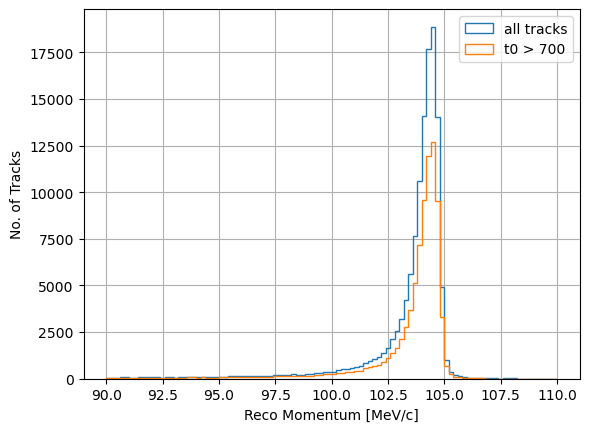

In [29]:
# Create a figure to put our plots on
fig, ax = plt.subplots(1,1)

# Create a histogram of all the tracks
min_mom=90
max_mom=110
mom_bin_width=0.2
n_mom_bins=int((max_mom - min_mom) / mom_bin_width)
content, edges, patches = ax.hist(flattened_dement_mom.mag,
                                  bins=n_mom_bins,
                                  range=(min_mom,max_mom),
                                  label="all tracks",
                                  histtype='step')

content, edges, patches = ax.hist(flattened_dement_mom_tcut.mag,
                                  bins=n_mom_bins,
                                  range=(min_mom,max_mom),
                                  label="t0 > 700",
                                  histtype='step')


ax.legend()
ax.set_xlabel('Reco Momentum [MeV/c]')
ax.set_ylabel('No. of Tracks')
ax.grid(True)
plt.show()